<a href="https://colab.research.google.com/github/Vladislavjk/ML-Notebooks/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy.cluster.hierarchy as sch

from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
class_names = [
	'T-shirt/top',
	'Trouser',
	'Pullover',
	'Dress',
	'Coat',
	'Sandal',
	'Shirt',
	'Sneaker',
	'Bag',
	'Ankle boot']

# Data processing

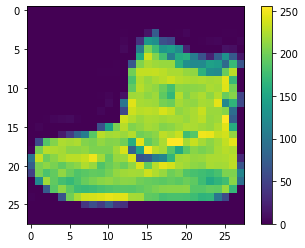

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

### Normalize data

In [5]:
x_train = x_train / 255
x_test = x_test / 255

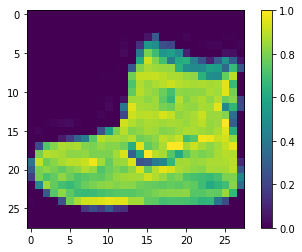

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()

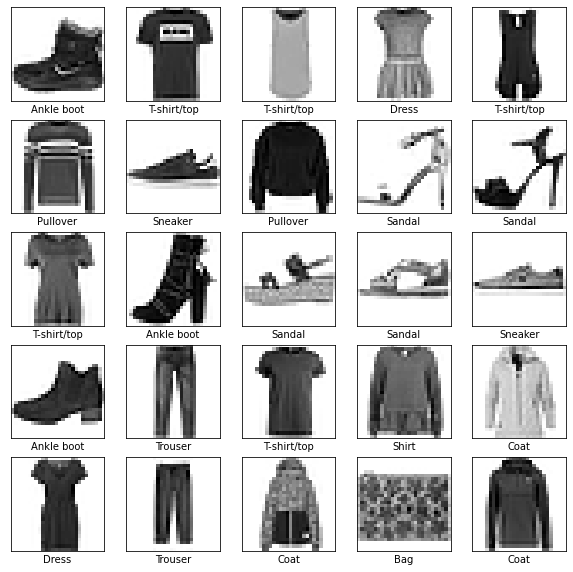

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

# Dimensionality Reduction Algorithm PCA

In [6]:
X_train = [c.flatten() for c in x_train]
X_test = [c.flatten() for c in x_test]

In [7]:
%%time
pca = PCA(n_components=0.9, random_state=17)
X_pca = pca.fit_transform(X_train)

CPU times: user 22.4 s, sys: 1.36 s, total: 23.7 s
Wall time: 14.2 s


In [ ]:
X_pca.shape

(60000, 84)

##### So we need 84 features to save 90% of variance

How much variance is preserved depending on the number of principal components

In [ ]:
pca.explained_variance_ratio_

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273,
       0.00275603, 0.00265062, 0.00263703, 0.00255835, 0.00246212,
       0.00235901, 0.0023029 , 0.00225522, 0.00218476, 0.00209324,
       0.00200282, 0.0019574 , 0.00194689, 0.00182783, 0.00175354,
       0.00171926, 0.00168792, 0.00163975, 0.00160908, 0.00154846,
       0.00152295, 0.00150044, 0.00146795, 0.00143312, 0.00138277,
       0.00136997, 0.00131154, 0.00128846, 0.00127249, 0.00125851,
       0.00121452, 0.00120198, 0.00118143, 0.00116257, 0.00115583,
       0.00112295, 0.00111075, 0.00109669, 0.00105128, 0.00104659,
       0.001031  , 0.00101051, 0.00097795, 0.00095689, 0.00093

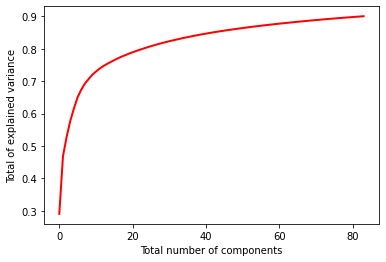

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='r');
plt.xlabel('Total number of components');
plt.ylabel('Total of explained variance');

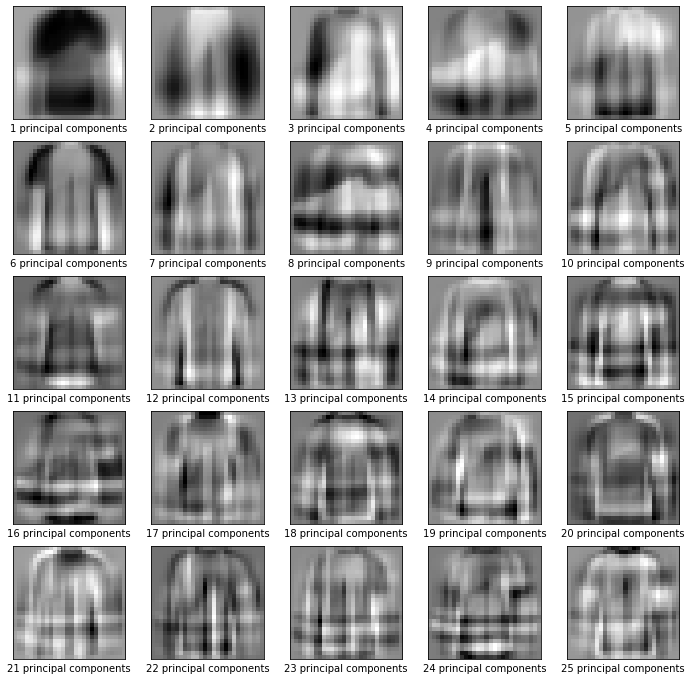

In [27]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(pca.components_[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.xlabel(f'{i + 1} principal components')

# Dimensionality Reduction Algorithm t-SNE

In [34]:
%%time
tsne = TSNE(n_components=2, random_state=17)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 33min 32s, sys: 1min 11s, total: 34min 43s
Wall time: 21min 17s


## Data visualization in the projection onto the two principal components

#### PCA

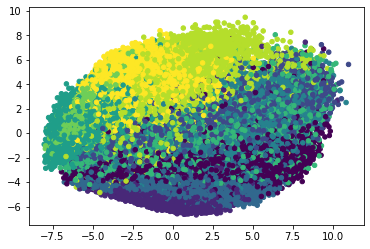

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=20, cmap='viridis');

#### t-SNE

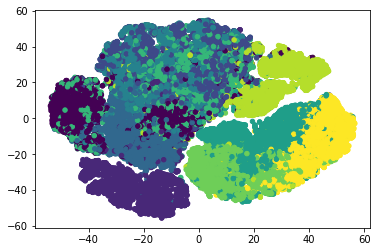

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, s=20, cmap='viridis');

As we can see, the t-SNE algorithm visualization is much better, however, it also took much longer to work.

# Clustering using KMeans

### PCA

In [35]:
%%time
kmeans = KMeans(n_clusters=10, n_init = 100, random_state=17)
clusters = kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

CPU times: user 2min 28s, sys: 10.5 s, total: 2min 39s
Wall time: 1min 30s


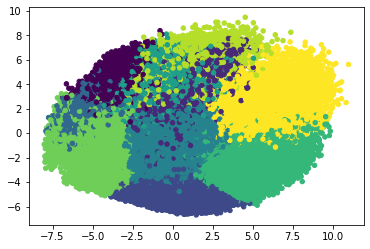

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  cmap='viridis');

##### Build a confusion matrix

In [ ]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = class_names + ['all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']

In [ ]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
T-shirt/top,0,29,201,2,1582,0,3404,594,23,165,6000
Trouser,0,0,5414,0,129,0,235,156,3,63,6000
Pullover,0,27,9,1,1786,1,115,515,27,3519,6000
Dress,0,7,3207,0,524,0,1683,525,5,49,6000
Coat,0,30,155,0,1079,0,872,253,15,3596,6000
Sandal,482,13,1,1443,29,260,2,3766,4,0,6000
Shirt,0,17,62,6,2069,1,1055,775,62,1953,6000
Sneaker,778,0,0,4687,0,25,0,509,1,0,6000
Bag,67,2443,28,237,228,6,22,494,2207,268,6000
Ankle boot,2950,0,2,166,36,2669,2,170,4,1,6000


In [41]:
def evaluate_model(y_train, cluster_labels):
  print(f'''ARI - {metrics.adjusted_rand_score(y_train, cluster_labels)}
AMI - {metrics.adjusted_mutual_info_score(y_train, cluster_labels, average_method='arithmetic')}
Homogenity - {metrics.homogeneity_score(y_train, cluster_labels)}
Completeness - {metrics.completeness_score(y_train, cluster_labels)}
V-measure - {metrics.v_measure_score(y_train, cluster_labels)}
  ''')

In [36]:
evaluate_model(y_train, cluster_labels)

ARI - 0.3476558868252765
AMI - 0.5114339603108142
Homogenity - 0.5002914378616863
Completeness - 0.5233907535584825
V-measure - 0.5115804785038204
  


### t-SNE

In [38]:
kmeans = KMeans(n_clusters=10, n_init = 100, random_state=17)
clusters = kmeans.fit(X_tsne)
cluster_labels = kmeans.labels_

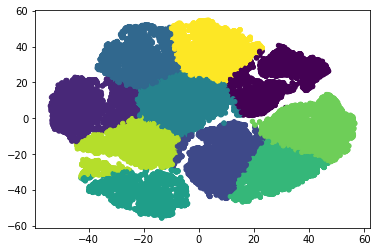

In [11]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, s=20,  cmap='viridis');

##### Build a confusion matrix

In [12]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = class_names + ['all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']

In [13]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
T-shirt/top,165,3282,16,44,1620,1,0,1,752,119,6000
Trouser,2,9,60,72,76,4758,0,1,1005,17,6000
Pullover,165,60,6,1635,1507,1,0,1,31,2594,6000
Dress,30,1233,139,162,437,30,0,1,3957,11,6000
Coat,36,706,6,2720,1113,2,0,0,52,1365,6000
Sandal,13,0,2789,0,39,0,805,2354,0,0,6000
Shirt,369,882,13,810,1944,3,0,2,468,1509,6000
Sneaker,0,0,3993,0,3,0,1930,74,0,0,6000
Bag,5431,15,32,37,178,0,19,6,29,253,6000
Ankle boot,2,0,15,0,2,0,1861,4120,0,0,6000


In [42]:
evaluate_model(y_train, cluster_labels)

ARI - 0.4064153520377501
AMI - 0.5648711837261378
Homogenity - 0.5639262337701487
Completeness - 0.5660759111048532
V-measure - 0.5649990277012744
  


# Clustering using SpectralClustering

### PCA

In [43]:
%%time
spectral = SpectralClustering(n_clusters=10, random_state=17, affinity='nearest_neighbors')
clusters = spectral.fit(X_pca)
cluster_labels = spectral.labels_

CPU times: user 11min 6s, sys: 5min 38s, total: 16min 45s
Wall time: 10min 29s


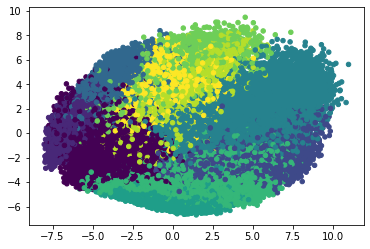

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  cmap='viridis')

##### Build a confusion matrix

In [11]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = class_names + ['all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']

In [12]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
T-shirt/top,1182,1,3726,0,278,1,765,23,24,0,6000
Trouser,63,0,0,0,133,5541,262,0,0,1,6000
Pullover,1066,1,21,0,4818,0,75,12,7,0,6000
Dress,254,0,97,0,209,7,5428,3,2,0,6000
Coat,473,0,8,0,4588,2,914,9,6,0,6000
Sandal,2411,3206,0,248,0,0,0,3,2,130,6000
Shirt,1548,0,966,0,2917,0,517,42,9,1,6000
Sneaker,39,4633,0,1308,0,0,0,0,0,20,6000
Bag,187,60,5,14,354,0,114,2439,2827,0,6000
Ankle boot,111,64,0,3344,0,0,0,2,0,2479,6000


In [44]:
evaluate_model(y_train, cluster_labels)

ARI - 0.4393564752540042
AMI - 0.6204332266793597
Homogenity - 0.6030872064853419
Completeness - 0.6390495092164566
V-measure - 0.6205477681278132
  


### t-SNE

In [45]:
%%time
spectral = SpectralClustering(n_clusters=10, random_state=17, affinity='nearest_neighbors')
clusters = spectral.fit(X_tsne)
cluster_labels = spectral.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


CPU times: user 9min 20s, sys: 6min 17s, total: 15min 38s
Wall time: 9min 26s


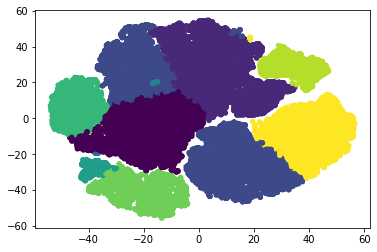

In [46]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, s=20,  cmap='viridis')

##### Build a confusion matrix

In [47]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = class_names + ['all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']

In [48]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
T-shirt/top,2353,302,81,4,1,1,3230,1,25,2,6000
Trouser,270,39,17,0,73,705,0,4895,0,1,6000
Pullover,324,3979,1661,0,0,0,22,1,1,12,6000
Dress,5310,46,555,2,0,1,64,17,4,1,6000
Coat,753,2447,2779,1,0,1,8,2,6,3,6000
Sandal,14,34,3278,0,0,0,0,0,4,2670,6000
Shirt,1269,3017,919,4,0,0,774,3,8,6,6000
Sneaker,0,3,5727,0,0,0,0,0,0,270,6000
Bag,86,2837,86,0,0,0,2,0,2980,9,6000
Ankle boot,0,4,802,0,0,0,0,0,0,5194,6000


In [49]:
evaluate_model(y_train, cluster_labels)

ARI - 0.3340069401855025
AMI - 0.5423446564863058
Homogenity - 0.49000999077001367
Completeness - 0.607576793011244
V-measure - 0.5424968724748197
  
